In [1]:
# dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
%matplotlib inline

In [2]:
df = pd.read_csv('test3.csv')


Question 1: Is Age a factor in determining high risk mortality? 

In [3]:
age_plot = df[['Mean Age','Mortality','Mortality_bin']]
age_plot

,Mean Age,Mortality,Mortality_bin
0,56,0.28,1
1,69,1.00,1
2,52,0.00,0
3,58,0.16,1
4,59,0.15,1
...,...,...,...
1151,64,0.13,1
1152,56,0.15,1
1153,63,0.13,1
1154,62,0.31,1


In [4]:
X = age_plot[["Mean Age"]]
y = age_plot[["Mortality"]]
print(X.shape, y.shape)

(1156, 1) (1156, 1)


Text(0.5, 1.0, 'Age vs Mortality')

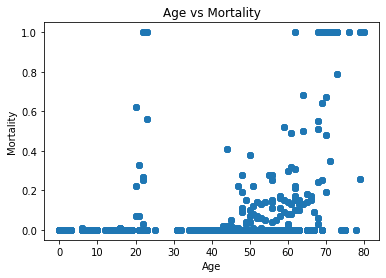

In [5]:
# Comment about this plot and how 20s have high mortality 
plt.scatter(X,age_plot[["Mortality"]])
plt.xlabel('Age')
plt.ylabel('Mortality')
plt.title('Age vs Mortality')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [8]:
kmeans.fit(X_test, y_test)

KMeans(n_clusters=6)

In [9]:
predicted_clusters = kmeans.predict(X_test)

In [11]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_


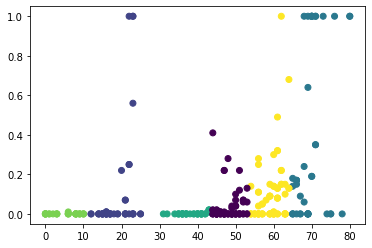

In [12]:
plt.scatter(X_test, y_test, c = labels, cmap='viridis')

In [13]:
predicted_clusters = kmeans.predict(X)

Text(0, 0.5, 'Cluster')

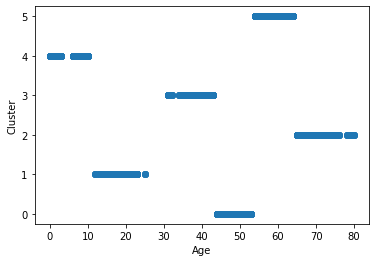

In [14]:
plt.scatter(X,predicted_clusters)
plt.xlabel('Age')
plt.ylabel('Cluster')

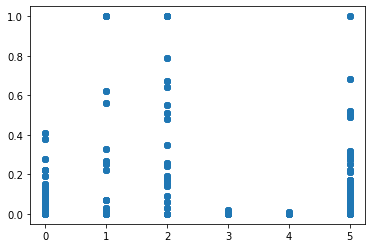

In [15]:
[predicted_clusters, y]
plt.scatter(predicted_clusters, y)
#clusters 0, 1, 4 have high mortality risk 
#so if user inputs age in cluster 0,1,4 
# then, output will be high risk 

In [16]:
y_test

,Mortality
972,0.00
202,0.01
661,0.00
1049,0.00
953,1.00
...,...
325,0.01
386,0.00
329,0.00
1126,0.08


In [17]:
cluster_df = pd.DataFrame(X_test['Mean Age'])


In [18]:
cluster_df['labels']= labels


In [19]:
cluster_df['Mortality']= y_test
cluster_df

,Mean Age,labels,Mortality
972,23,1,0.00
202,16,1,0.01
661,63,5,0.00
1049,56,5,0.00
953,70,2,1.00
...,...,...,...
325,46,0,0.01
386,35,3,0.00
329,35,3,0.00
1126,61,5,0.08


In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=500)
classifier

LogisticRegression(max_iter=500)

In [21]:
labels=labels.reshape(-1,1)
labels.shape

(289, 1)

In [26]:
cluster_df['Mortality']

972     0.00
202     0.01
661     0.00
1049    0.00
953     1.00
        ... 
325     0.01
386     0.00
329     0.00
1126    0.08
59      0.00
Name: Mortality, Length: 289, dtype: float64

In [27]:
mortality_bin=[]
for i in cluster_df['Mortality']:
    if i>0.123: #using mean as value to discriminate between mortality of 1 or 0 
        mortality_bin.append(1)
    else:
        mortality_bin.append(0)
cluster_df['Mortality_bin']=mortality_bin

In [28]:
cluster_df


,Mean Age,labels,Mortality,Mortality_bin
972,23,1,0.00,0
202,16,1,0.01,0
661,63,5,0.00,0
1049,56,5,0.00,0
953,70,2,1.00,1
...,...,...,...,...
325,46,0,0.01,0
386,35,3,0.00,0
329,35,3,0.00,0
1126,61,5,0.08,0


In [29]:
classifier.fit(labels, cluster_df['Mortality_bin'])

LogisticRegression(max_iter=500)

In [38]:
new_data = [1,0]
predictions = classifier.predict(new_data)

ValueError: Expected 2D array, got 1D array instead:
array=[1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# columns = ['Unnamed: 0', "ID","Country","Province/State", "Study Pop Size (N)",
# "Positive/negative cases", "AgeGroup_pediatrics", "AgeGroup_youngAdult",
# "AgeGroup_aging",'Mortality_bin']
# df = df.drop(columns=columns)


In [ ]:
# columns = ['White or European', "African American","Asian","Hispanic or Latino", "Multiple ethnicities or other"]
# df = df.drop(columns=columns)


In [ ]:
X = df.drop("Mortality", axis=1)
y = df["Mortality"]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [ ]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

model = Sequential()

In [ ]:
number_inputs = 29
number_hidden_nodes = 50
hidden_layer = Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs) 
model.add(hidden_layer)

In [ ]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])


In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)


In [ ]:
# model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


In [ ]:
# grabbing all columns 
my_list = df.columns.values.tolist()
my_list;

In [ ]:
# How to use labels for classification? 

Machine Learning


In [ ]:
age = df[['AgeGroup_pediatrics','AgeGroup_youngAdult','AgeGroup_aging','Mortality_bin']]
age

In [ ]:
X = age[['AgeGroup_pediatrics','AgeGroup_youngAdult','AgeGroup_aging']]
y= age['Mortality_bin']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
target = age["Mortality_bin"]
target_names = ["no risk", "risk"]

data = age.drop("Mortality_bin", axis=1)
feature_names = data.columns


In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

In [ ]:
new_age_data = [[0, 1, 0]]
predicted_class = knn.predict(new_age_data)
print(predicted_class)

In [ ]:
#Fitting to Decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
#Fitting to Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
#Decision Tree and Random Forest gives same score 

In [ ]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [ ]:
# KNN- use later to figure out user input 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()



In [ ]:
X=iris.data

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=2 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
